## We now do a project of clustering Customer Segmentation - Credit Cards data





First we will explore the data

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('./data/CC_GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


So we have all these coloumns and represents the follow:
- BALANCE : Balance amount left in customers account to make purchases
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user
(1=frequent, 0=not frequent)

After showing the data and know it let's do some exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Let's show the missing values and how can we handle it

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Now we had a one missing value in the creit_limit I think we can inpute it with median
but in the minimum_payments we had many missing values I think if we impute this values by mean or median will not be helpdul due to the feature is describe MINIMUM_PAYMENTS : Minimum amount of payments made by user so we can imagine that the missing value menas that there is no pauments with this customer so I will impute them by zero 

In [6]:
df_cleaning = df.copy()

In [7]:
# Fill missing CREDIT_LIMIT with median
df_cleaning['CREDIT_LIMIT'].fillna(df_cleaning['CREDIT_LIMIT'].median(), inplace=True)

# Fill missing MINIMUM_PAYMENTS with zero
df_cleaning['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

In [8]:
df_cleaning.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Check dupicates

In [9]:
# Find duplicate rows across all columns 
duplicates = df_cleaning[df_cleaning.duplicated()] 
print(duplicates)

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


All done

Now we can drop the Cust_ID column we don't need this column 

In [10]:
df_cleaning.drop('CUST_ID', axis=1, inplace=True)

In [11]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Make a copy of our data to use it in clustering

In [12]:
df_clustering = df_cleaning.copy()

Check Variance

In [13]:
variances = df_clustering.var() 
print(variances)

BALANCE                             4.332775e+06
BALANCE_FREQUENCY                   5.612351e-02
PURCHASES                           4.565208e+06
ONEOFF_PURCHASES                    2.755228e+06
INSTALLMENTS_PURCHASES              8.178274e+05
CASH_ADVANCE                        4.398096e+06
PURCHASES_FREQUENCY                 1.610985e-01
ONEOFF_PURCHASES_FREQUENCY          8.900441e-02
PURCHASES_INSTALLMENTS_FREQUENCY    1.579647e-01
CASH_ADVANCE_FREQUENCY              4.004857e-02
CASH_ADVANCE_TRX                    4.657580e+01
PURCHASES_TRX                       6.179027e+02
CREDIT_LIMIT                        1.323975e+07
PAYMENTS                            8.381394e+06
MINIMUM_PAYMENTS                    5.456849e+06
PRC_FULL_PAYMENT                    8.555578e-02
TENURE                              1.791129e+00
dtype: float64


Now we can visualize our dataset 

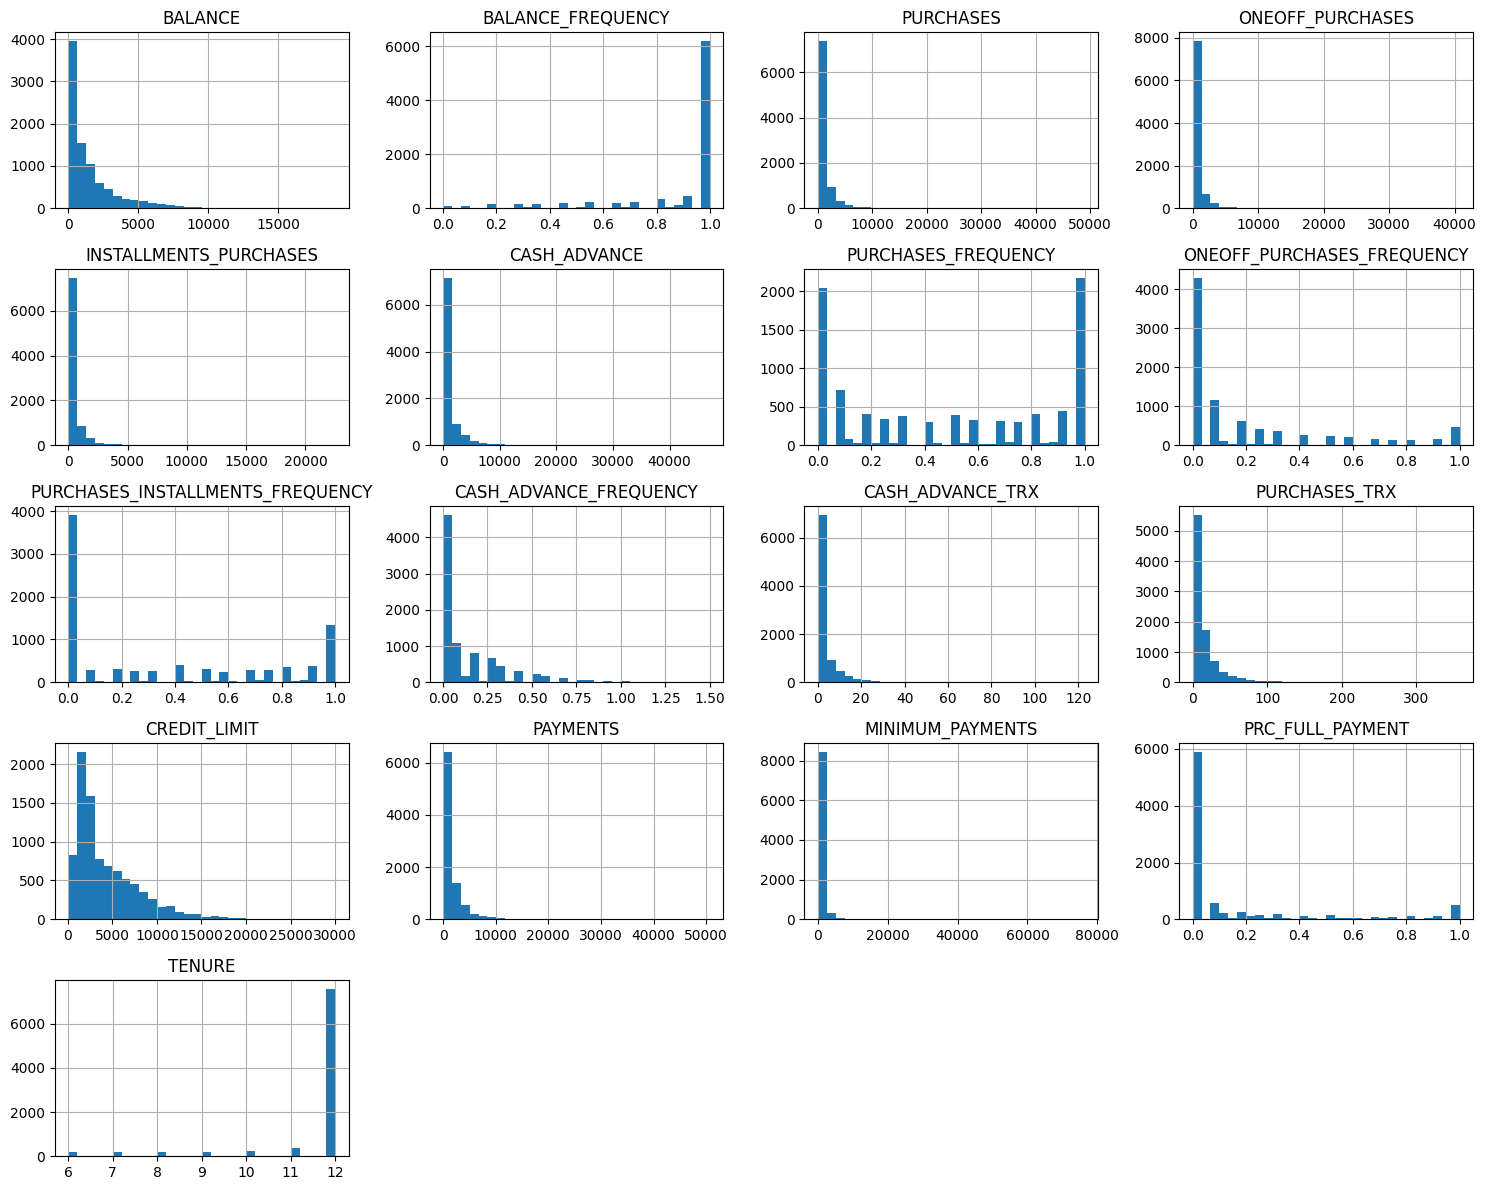

In [14]:
df_clustering.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

Almost all the data are skewed to the right we can use log transformation for this features

In [15]:
skewness = df_clustering.skew()
skewness

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522636
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.808430
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [16]:
skewed_cols = skewness[skewness > 1].index
df_log = df_clustering.copy()
df_log[skewed_cols] = df_log[skewed_cols].apply(np.log1p)

In [17]:
df_log[skewed_cols].skew()

BALANCE                      -0.861021
PURCHASES                    -0.764492
ONEOFF_PURCHASES              0.185854
INSTALLMENTS_PURCHASES       -0.024981
CASH_ADVANCE                  0.262594
ONEOFF_PURCHASES_FREQUENCY    1.290617
CASH_ADVANCE_FREQUENCY        1.455462
CASH_ADVANCE_TRX              0.940131
PURCHASES_TRX                 0.032697
CREDIT_LIMIT                 -0.101408
PAYMENTS                     -1.778312
MINIMUM_PAYMENTS             -1.291787
PRC_FULL_PAYMENT              1.746046
dtype: float64

Showing the data after log 

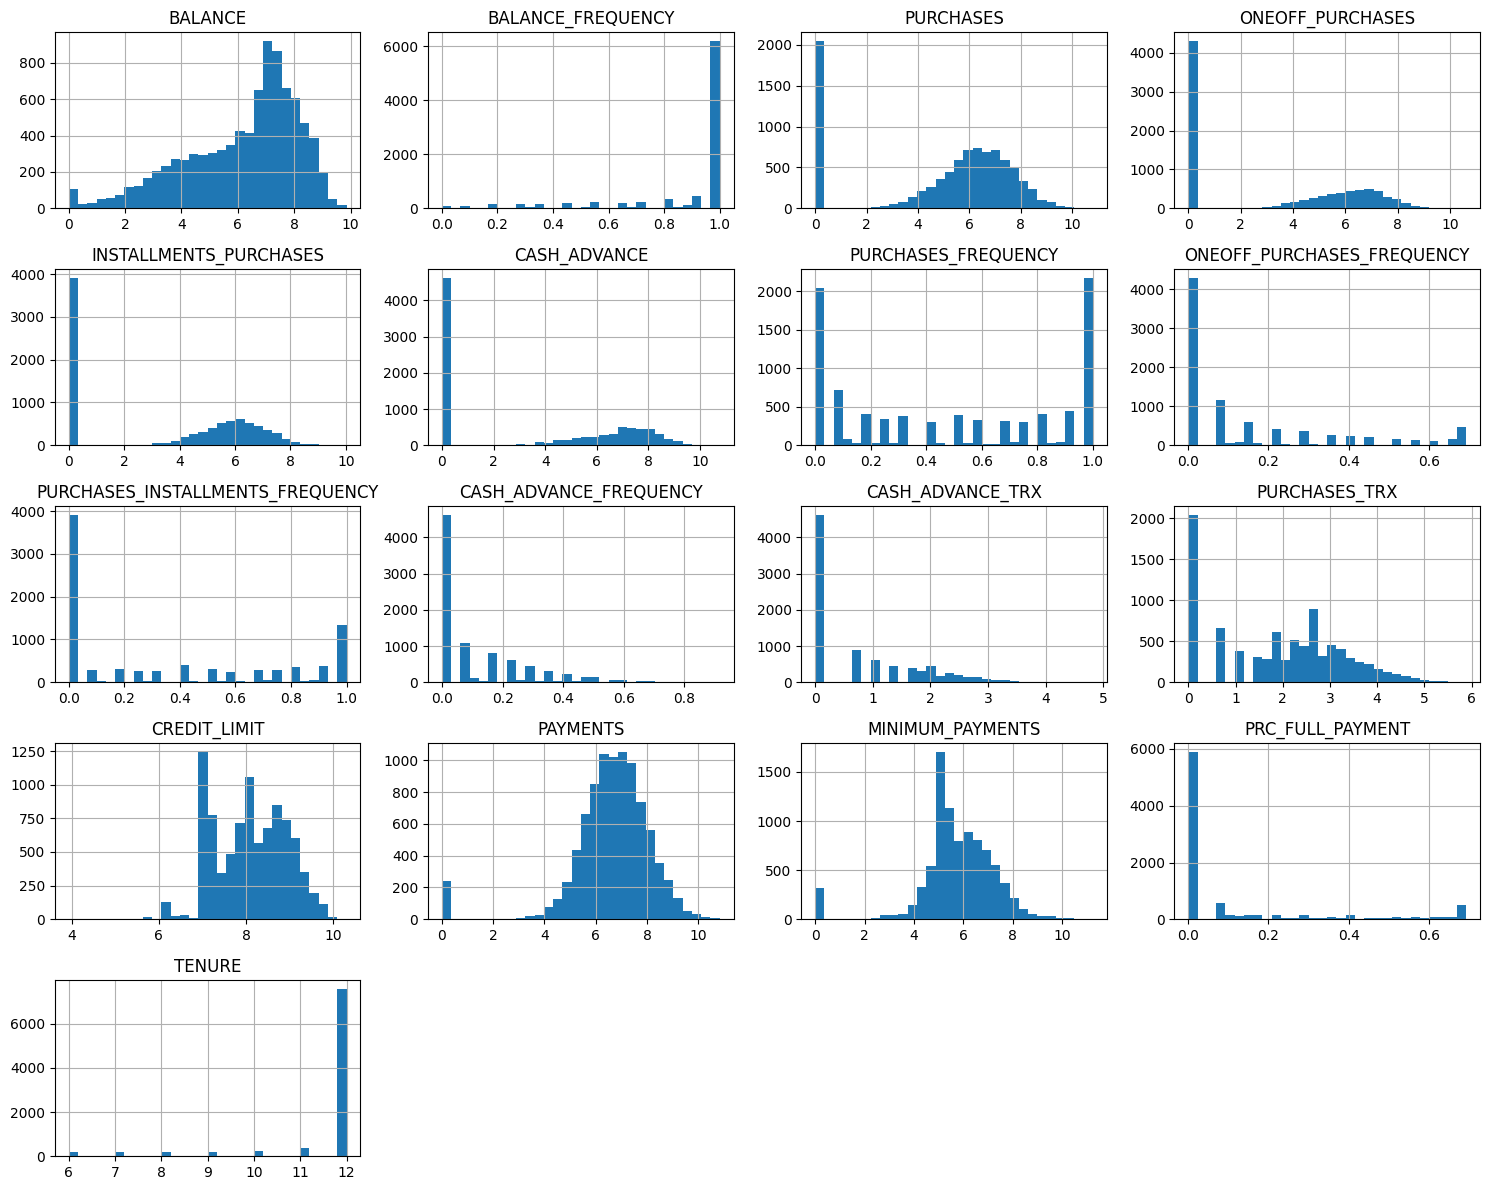

In [18]:
df_log.hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

We can visualize with PCA

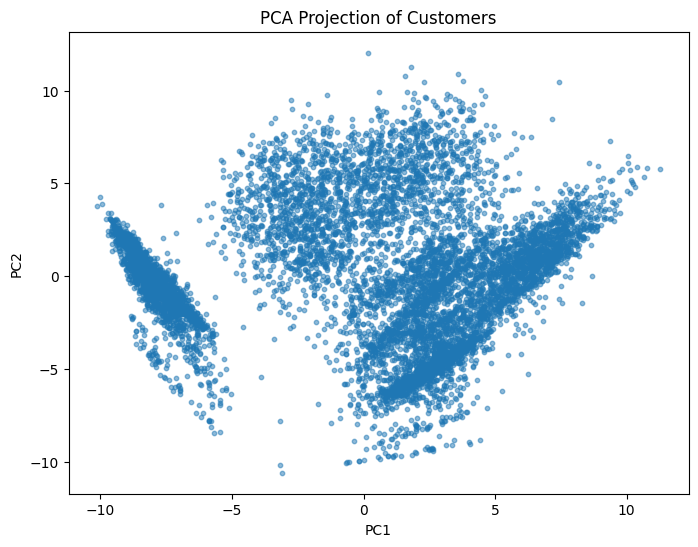

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_log)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=10, alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Customers")
plt.show()

In [20]:
print(pca.explained_variance_ratio_)

[0.46031659 0.23434109]


Using t-SNE also to have a good visualize the data

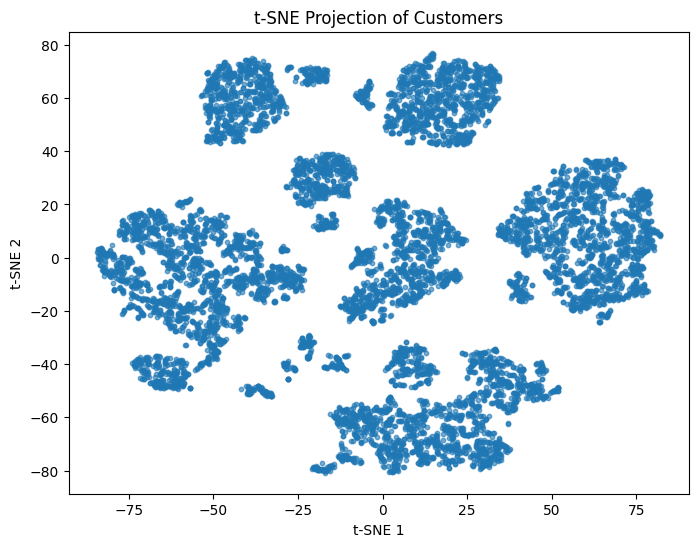

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate='auto',
    init='pca',
    random_state=42
)

X_tsne = tsne.fit_transform(df_log)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, alpha=0.6)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE Projection of Customers")
plt.show()

We have now a good visualization about the data and a good chance to choose a good cluster number


I will use various cluster algoritms so I will generate many datas' copy to handle this 

In [22]:
k_means_data = df_log.copy()
gmm_data = df_log.copy()

Test K-means with various number of k

This score, as clearly stated by the [SKLearn](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) developers, consider two measures:
- The mean distance between a sample and all other points in the same cluster.
- ==The mean distance between a sample and all other points in the== ==_next nearest cluster_====.

Advantages:
- The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

Drawbacks:

- The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.


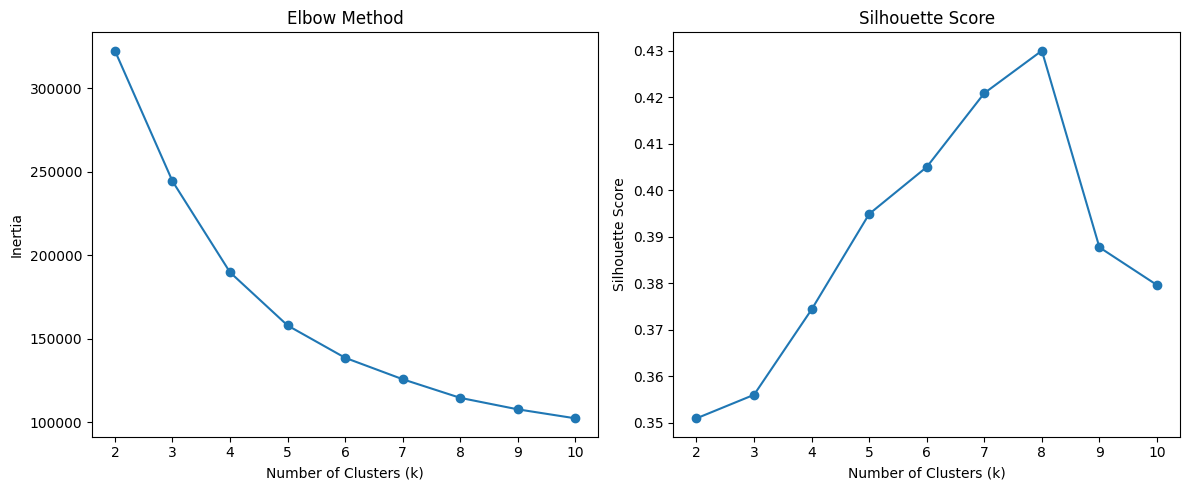

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=20,
        random_state=42
    )
    
    labels = kmeans.fit_predict(k_means_data)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(k_means_data, labels))

# Plot Elbow
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

# Plot Silhouette
plt.subplot(1,2,2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

In [24]:
kmeans = KMeans(
    n_clusters=8,
    init="k-means++",
    n_init=20,
    random_state=42
)

clusters = kmeans.fit_predict(k_means_data)

k_means_data['cluster'] = clusters

In [25]:
score = silhouette_score(k_means_data, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.4841803668340411


In [26]:
cluster_summary = k_means_data.groupby('cluster').mean()
overall_mean = k_means_data.mean()

relative_behavior = cluster_summary / overall_mean
print(relative_behavior)

          BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
cluster                                                                      
0        1.184543           1.068033      2.091427                2.231958   
1        1.192344           1.094866      2.094561                1.953160   
2        1.021073           1.078297      0.007586                0.005122   
3        0.705636           0.921175      0.004689                0.003456   
4        1.158215           1.033957      2.072532                2.057118   
5        0.531198           0.458664      0.858756                0.605189   
6        1.218999           1.106741      2.098823                2.173155   
7        0.883420           0.905877      0.017676                0.013205   

         CASH_ADVANCE_TRX  CREDIT_LIMIT  INSTALLMENTS_PURCHASES  \
cluster                                                           
0                2.160677      1.007399                0.023057   
1                1

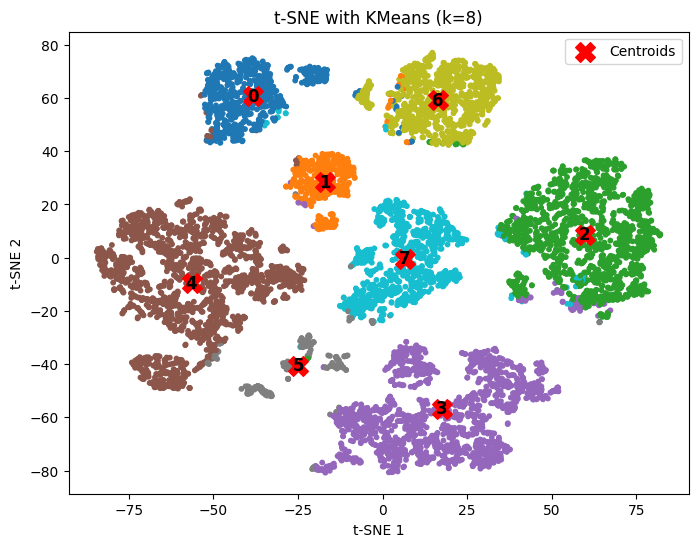

In [27]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], 
                      c=clusters, cmap='tab10', s=10)

# Plot centroids (projected into t-SNE space by averaging points per cluster)
centroid_tsne = np.array([X_tsne[clusters==i].mean(axis=0) for i in np.unique(clusters)])
plt.scatter(centroid_tsne[:,0], centroid_tsne[:,1], 
            c='red', marker='X', s=200, label='Centroids')

# Annotate cluster numbers near centroids
for i, (x, y) in enumerate(centroid_tsne):
    plt.text(x, y, str(i), fontsize=12, weight='bold', color='black',
             ha='center', va='center')

plt.title("t-SNE with KMeans (k=8)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()


This is K-means 

Let's try Another algorithm which is GMM

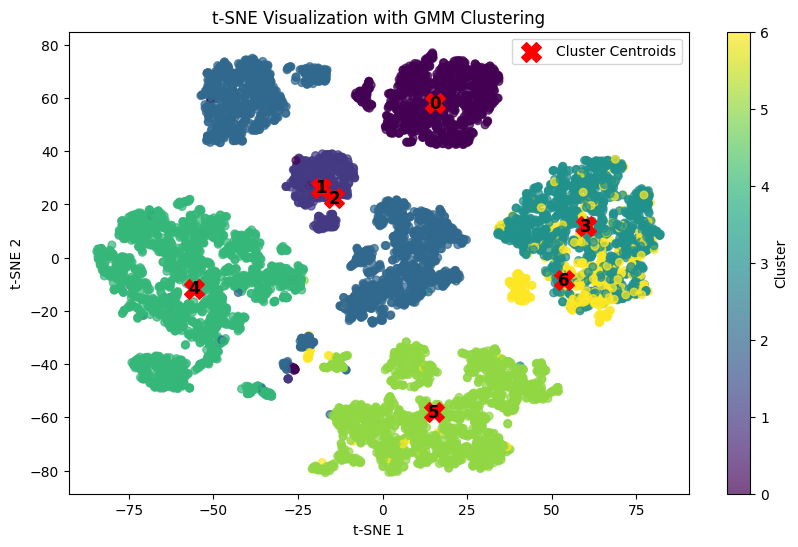

In [28]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Fit GMM
gmm = GaussianMixture(n_components=7, random_state=42)
gmm.fit(gmm_data)

# Predict cluster labels
labels = gmm.predict(gmm_data)

# Add cluster labels to DataFrame
gmm_data['Cluster'] = labels

# Visualize with t-SNE projection
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], 
                      c=labels, cmap='viridis', s=30, alpha=0.7)

# Plot approximate cluster centroids in t-SNE space
centroid_tsne = np.array([X_tsne[labels==i].mean(axis=0) for i in np.unique(labels)])
plt.scatter(centroid_tsne[:,0], centroid_tsne[:,1], 
            c='red', marker='X', s=200, label='Cluster Centroids')


# Annotate cluster numbers near centroids
for i, (x, y) in enumerate(centroid_tsne):
    plt.text(x, y, str(i), fontsize=12, weight='bold', color='black',
             ha='center', va='center')
    

plt.title("t-SNE Visualization with GMM Clustering")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(scatter, label="Cluster")
plt.legend()
plt.show()


In [29]:
cluster_summary = gmm_data.groupby('Cluster').mean()
overall_mean = gmm_data.mean()

relative_behavior = cluster_summary / overall_mean
print(relative_behavior)

          BALANCE  BALANCE_FREQUENCY  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
Cluster                                                                      
0        1.211350           1.104167      2.076879                2.143341   
1        1.185195           1.090379      2.090677                1.955855   
2        0.990223           0.952625      0.885332                0.924176   
3        1.073052           1.139899      0.000000                0.000000   
4        1.134695           1.006278      2.066565                2.027934   
5        0.690381           0.898612      0.000000                0.000000   
6        0.793171           0.847851      0.000000                0.000000   

         CASH_ADVANCE_TRX  CREDIT_LIMIT  Cluster  INSTALLMENTS_PURCHASES  \
Cluster                                                                    
0                2.176820      1.035490      NaN                1.796547   
1                1.995991      0.996131      NaN                1.708

This is GMM

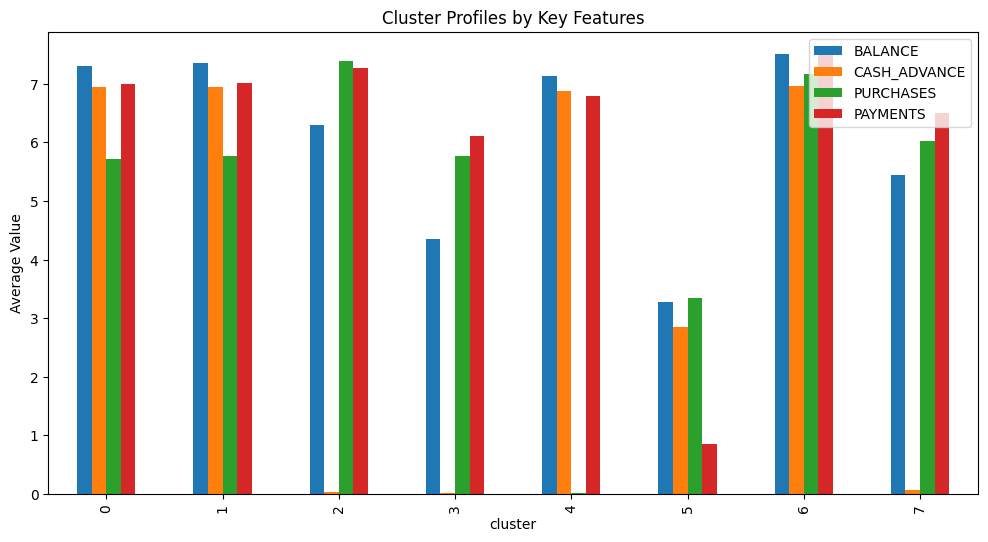

In [30]:
cluster_summary = k_means_data.groupby('cluster').mean()

features = ['BALANCE','CASH_ADVANCE','PURCHASES','PAYMENTS']
cluster_summary[features].plot(kind='bar', figsize=(12,6))
plt.title("Cluster Profiles by Key Features")
plt.ylabel("Average Value")
plt.show()


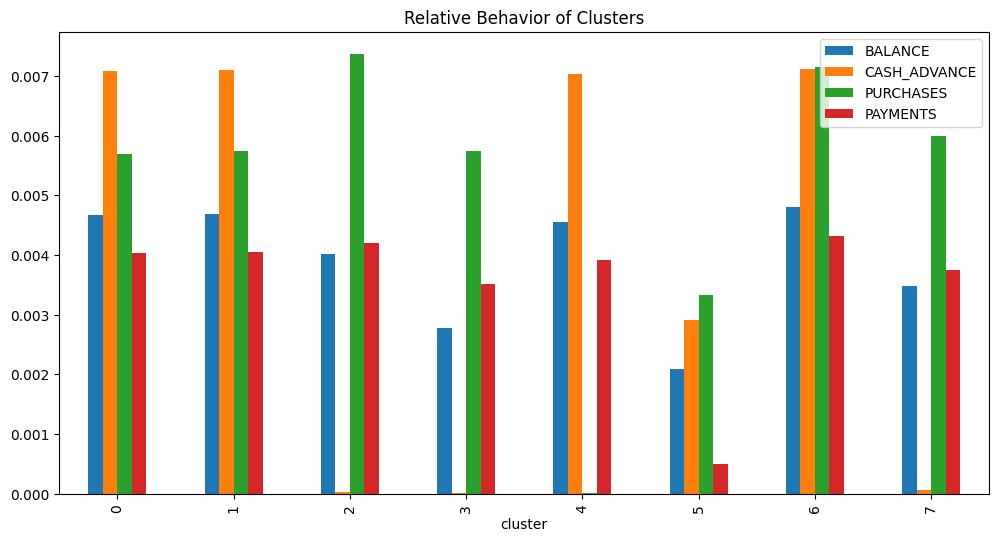

In [31]:
relative_behavior = cluster_summary / df_clustering.mean()
relative_behavior[features].plot(kind='bar', figsize=(12,6))
plt.title("Relative Behavior of Clusters")
plt.show()


I choose this features to diffrentiate between the clusters 
This Features is 
- BALANCE : Balance amount left in customers account to make purchases
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- CASH_ADVANCE : Cash in advance given by the user
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user

In [53]:
gmm_data[['BALANCE','PURCHASES','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','Cluster']]

,BALANCE,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Cluster
0,3.735304,4.568506,0.000000,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,5
1,8.071989,0.000000,0.000000,8.770896,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,4
2,7.822504,6.651791,6.651791,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2
3,7.419183,7.313220,7.313220,5.331694,0.693147,0.693147,8.922792,0.000000,0.000000,0.000000,2
4,6.707735,2.833213,2.833213,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,5.677165,0.000000,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,5
8946,3.004851,5.707110,0.000000,0.000000,0.000000,1.945910,6.908755,5.623517,0.000000,0.000000,5
8947,3.194529,4.979489,0.000000,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,5
8948,2.671218,0.000000,0.000000,3.625907,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,4


We need to compare the clusters with the real data

In [49]:
labels = pd.Series(labels, name='Cluster')

original_data_with_clusters = pd.concat([df_cleaning, labels], axis=1)

original_data_with_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


C:\Users\youss\AppData\Local\Temp\ipykernel_14300\851366784.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(original_data_with_clusters, x='Cluster', y=features[index], estimator='mean', palette='viridis', ax=axes[row, col])
C:\Users\youss\AppData\Local\Temp\ipykernel_14300\851366784.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(original_data_with_clusters, x='Cluster', y=features[index], estimator='mean', palette='viridis', ax=axes[row, col])
C:\Users\youss\AppData\Local\Temp\ipykernel_14300\851366784.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sa

Text(0.5, 0.98, 'Analysis For Each cluster')

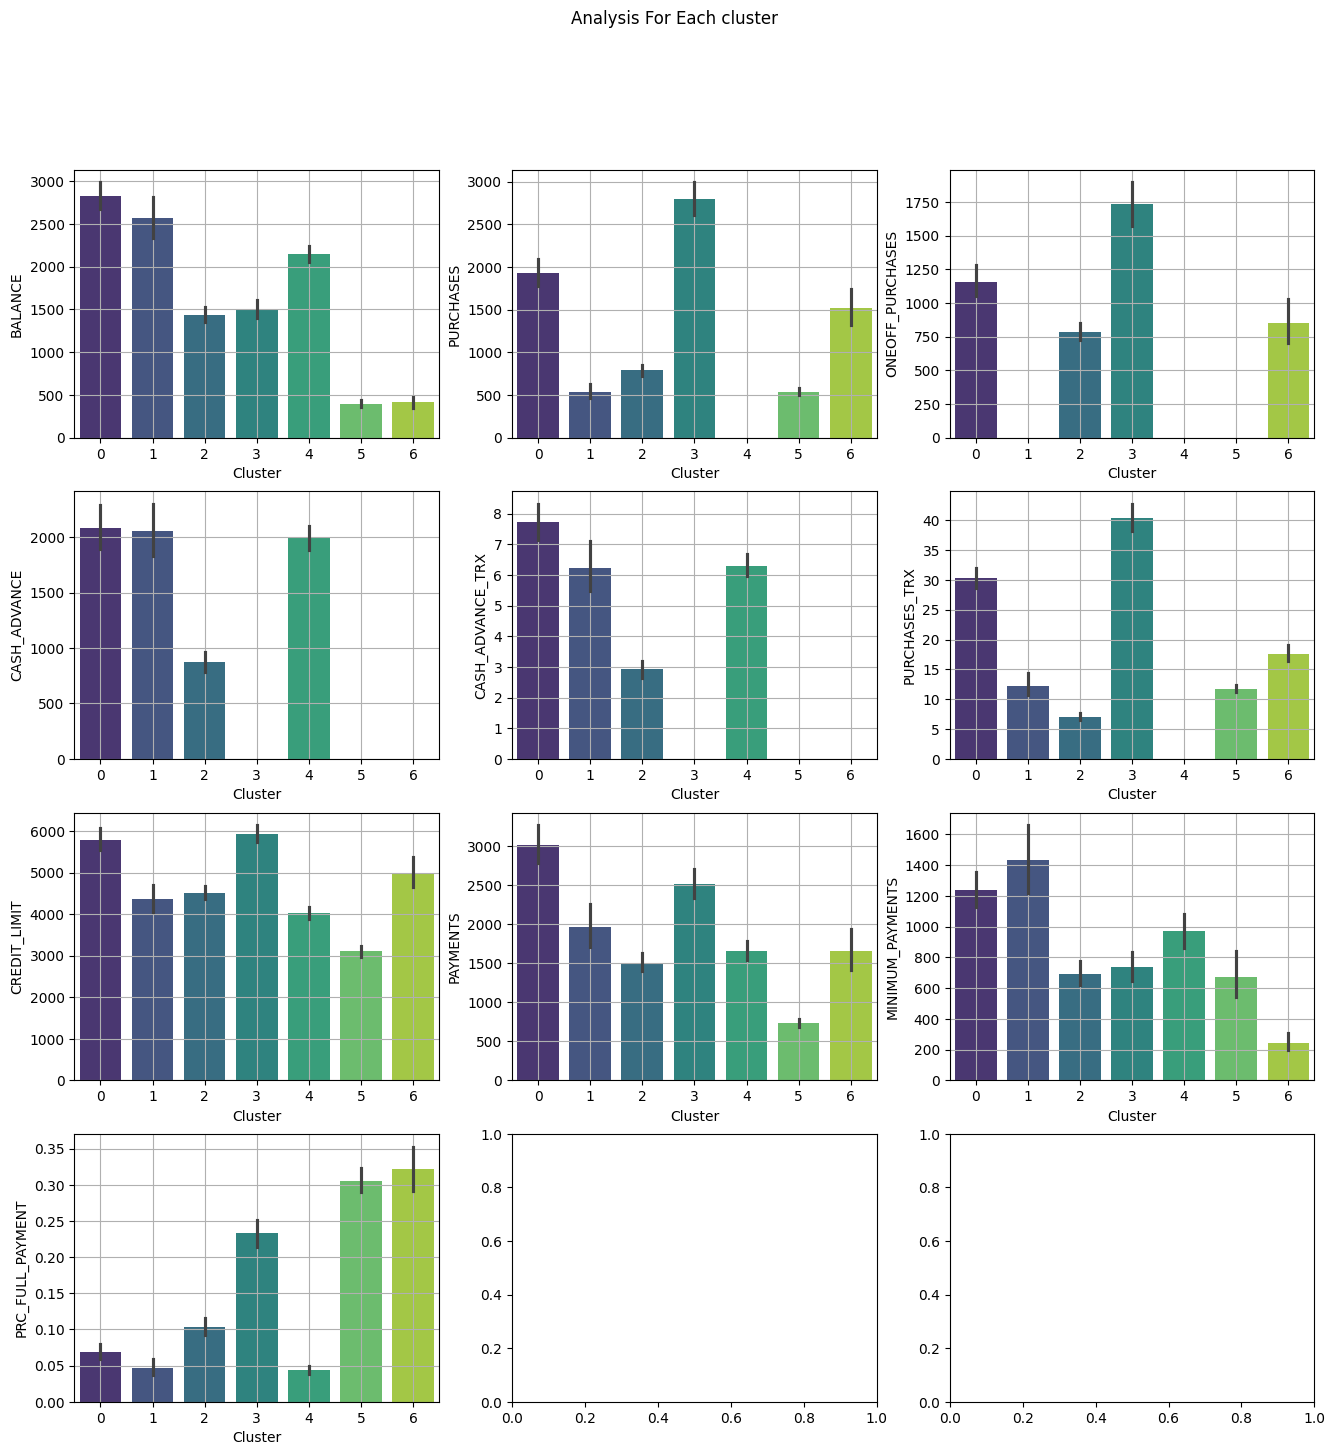

In [52]:
features = ['BALANCE','PURCHASES','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']
cols = 3
rows= 4

fig, axes = plt.subplots(rows, cols, figsize=(16, 16))


index = 0
for row in range(rows):
    for col in range(cols):
        if index >= len(features):
            break                # stop once we’ve exhausted the list
        sns.barplot(original_data_with_clusters, x='Cluster', y=features[index], estimator='mean', palette='viridis', ax=axes[row, col])
        axes[row, col].grid()
        index += 1
fig.suptitle('Analysis For Each cluster')

# 🧩 Customer Segmentation Portfolio
### Credit Card Behavioral Clustering — GMM (Gaussian Mixture Models, 7 Clusters)

---

## Feature Definitions

| Feature | Description |
|---|---|
| `BALANCE` | Balance amount left in customer's account to make purchases |
| `PURCHASES` | Total amount of purchases made from account |
| `ONEOFF_PURCHASES` | Maximum purchase amount done in one-go |
| `CASH_ADVANCE` | Cash in advance given by the user |
| `CASHADVANCE_TRX` | Number of transactions made with cash in advance |
| `PURCHASES_TRX` | Number of purchase transactions made |
| `PAYMENTS` | Amount of payment done by user |
| `MINIMUM_PAYMENTS` | Minimum amount of payments made by user |
| `MINIMUM_PAYMENTS` | Minimum amount of payments made by user |
| `PRC_FULL_PAYMENT` | Percent of full payment paid by user |
| `CREDIT_LIMIT` | Limit of credit card for user |

---

## Cluster 0 — Cash Advance Reliant

> *Users who primarily use their card for cash advances, not purchases*

**Key Characteristics:**
| Feature | Level | Interpretation |
|---|---|---|
| `BALANCE` | ~$2,850 — High | Large outstanding account balance |
| `CREDIT_LIMIT` | ~$6,000 — High | Substantial credit line available |
| `CASH_ADVANCE` | Very High | Primary card usage is cash withdrawal |
| `CASHADVANCE_TRX` | ~8 transactions | Frequent cash advance behavior |
| `PURCHASES` | Moderate | Moderate direct purchase activity |
| `PRC_FULL_PAYMENT` | ~6% | Rarely clears balance in full |
| `PAYMENTS` | ~$3,000 | Makes payments but balance persists |

**Behavioral Profile:**
These customers rely heavily on cash advances — withdrawing cash directly from their credit line rather than making purchases. Their high `CASH_ADVANCE` and `CASHADVANCE_TRX` values combined with a very low `PRC_FULL_PAYMENT` (~6%) indicate they are carrying revolving debt with high interest exposure. Despite having a high `CREDIT_LIMIT` (~$6,000), they make payments (`PAYMENTS` ~$3,000) but not enough to clear the balance, suggesting ongoing financial pressure.

**Recommended Strategies:**
- 💳 Debt consolidation and balance transfer offers with low intro APR
- 📉 Personalized lower interest rate campaigns for loyal customers
- 🧠 Financial wellness programs and budgeting tool access
- 📞 Proactive outreach before delinquency risk increases

---

## Cluster 1 — High Balance Revolvers

> *Carry the largest balances and make the highest minimum payments*

**Key Characteristics:**
| Feature | Level | Interpretation |
|---|---|---|
| `BALANCE` | ~$2,600 — High | Large revolving account balance |
| `CREDIT_LIMIT` | ~$4,500 — Moderate | Mid-range credit ceiling |
| `MINIMUM_PAYMENTS` | Highest of all clusters | Paying only the required minimum |
| `CASH_ADVANCE` | High | Significant cash advance usage |
| `PURCHASES` | Moderate | Active purchasers alongside cash usage |
| `PRC_FULL_PAYMENT` | ~5% | Almost never pays in full |
| `PAYMENTS` | High | High payments but not clearing balance |

**Behavioral Profile:**
This segment carries the highest `MINIMUM_PAYMENTS` of all clusters — a key signal that these customers are regularly making payments but only meeting the minimum threshold. Combined with high `BALANCE` and low `PRC_FULL_PAYMENT`, they are deeply revolving. This is a profitable segment from an interest revenue perspective but carries elevated delinquency risk.

**Recommended Strategies:**
- 🔄 Balance transfer offers with low introductory rates
- 🏆 Loyalty rewards upgrades to increase long-term retention
- ⚠️ Risk monitoring and early intervention scoring
- 📈 Structured repayment plans to reduce churn from over-leverage

---

## Cluster 2 — Low Activity Users

> *Hold an account but make minimal purchases or transactions*

**Key Characteristics:**
| Feature | Level | Interpretation |
|---|---|---|
| `BALANCE` | ~$1,450 — Moderate | Some outstanding balance |
| `CREDIT_LIMIT` | ~$4,700 — Moderate | Decent limit relative to low usage |
| `PURCHASES` | Low | Infrequent purchase behavior |
| `PURCHASES_TRX` | ~6 transactions | Very few purchase transactions |
| `CASH_ADVANCE` | Low | Rarely uses cash advance |
| `PRC_FULL_PAYMENT` | ~10% | Occasionally pays in full |
| `PAYMENTS` | Moderate | Makes payments but low activity overall |

**Behavioral Profile:**
These customers have a card but use it sparingly. Both `PURCHASES` and `PURCHASES_TRX` are low, and `CASH_ADVANCE` is minimal — indicating very little card engagement overall. They are not financially stressed (low balance relative to limit) but simply inactive. Represents untapped revenue potential if re-engaged.

**Recommended Strategies:**
- 📧 Re-engagement campaigns with spend-to-earn incentives
- 🎁 Bonus rewards on first purchase after 60-day inactivity
- 💰 Introductory cashback on grocery and everyday categories
- 📱 Personalized app notifications tied to spending triggers

---

## Cluster 3 — Active Big Spenders ⭐

> *The highest-value segment — maximum purchases and transactions*

**Key Characteristics:**
| Feature | Level | Interpretation |
|---|---|---|
| `PURCHASES` | ~$2,800 — **Highest** | Top purchase volume across all clusters |
| `ONEOFF_PURCHASES` | **Highest** | Makes large single-transaction purchases |
| `PURCHASES_TRX` | ~41 — **Highest** | Most frequent purchase transactions |
| `CREDIT_LIMIT` | ~$5,900 — High | High limit enabling large spend |
| `PAYMENTS` | ~$2,500 | Regularly pays down the balance |
| `BALANCE` | Moderate | Manageable despite high spend |
| `PRC_FULL_PAYMENT` | Moderate | Pays substantial portions regularly |

**Behavioral Profile:**
The most commercially valuable segment. These customers drive the highest `PURCHASES` volume and make the most `PURCHASES_TRX` of any cluster. Their high `ONEOFF_PURCHASES` suggests they use the card for large-ticket items alongside everyday spending. Regular `PAYMENTS` keep their balance manageable. This segment generates strong interchange revenue and has premium upgrade potential.

**Recommended Strategies:**
- 💎 Premium or metal card upgrade with elevated benefits
- ✈️ Travel rewards, airline miles, and hotel partnership programs
- 🛎️ VIP concierge access and exclusive event perks
- 📊 Higher credit limit offers to capture a greater share of spend

---

## Cluster 4 — Inactive Credit Holders

> *Hold credit but show near-zero purchase and payment activity*

**Key Characteristics:**
| Feature | Level | Interpretation |
|---|---|---|
| `BALANCE` | ~$1,500 — Moderate | Some balance sitting without activity |
| `CREDIT_LIMIT` | ~$4,000 — Moderate | Credit available but completely unused |
| `PURCHASES` | **Near Zero** | Barely uses card for purchases |
| `PURCHASES_TRX` | Very Low | Almost no purchase transactions |
| `PAYMENTS` | Low | Minimal payment activity |
| `PRC_FULL_PAYMENT` | ~4% | Rarely pays in full |
| `CASH_ADVANCE` | Low | Does not use cash advance either |

**Behavioral Profile:**
A dormant segment. Both `PURCHASES` and `PURCHASES_TRX` are near zero, and `CASH_ADVANCE` is also low — the card simply is not being used. Despite having a moderate `CREDIT_LIMIT` (~$4,000), low `PAYMENTS` confirm minimal engagement. This segment represents a churn and dormancy risk, tying up credit line allocation with no revenue return.

**Recommended Strategies:**
- 🔔 Spend-to-earn activation campaigns with a clear deadline
- ⏰ Dormancy alert messaging with retention incentives
- 🛒 Category-specific offers (groceries, fuel, dining) to spark first use
- 🎯 Lifestyle-based personalized nudges via app or email

---

## Cluster 5 — Responsible Transactors

> *Regular purchasers who pay a high proportion of their balance in full*

**Key Characteristics:**
| Feature | Level | Interpretation |
|---|---|---|
| `BALANCE` | ~$450 — **Low** | Consistently keeps balance very low |
| `CREDIT_LIMIT` | ~$3,100 — Moderate | Lower limit reflects conservative profile |
| `PRC_FULL_PAYMENT` | ~31% — High | Regularly clears most of the balance |
| `PURCHASES` | Moderate | Active but not excessive spending |
| `PURCHASES_TRX` | ~12 transactions | Consistent regular usage |
| `MINIMUM_PAYMENTS` | Low | Rarely stuck paying only minimum |
| `CASH_ADVANCE` | Very Low | Does not rely on cash advances |

**Behavioral Profile:**
A financially disciplined segment. High `PRC_FULL_PAYMENT` (~31%) combined with low `BALANCE` shows they consistently pay down what they spend. They use the card actively for `PURCHASES` but avoid cash advances entirely. Low `MINIMUM_PAYMENTS` confirms they pay well above the threshold. Low credit risk but also low interest revenue — valuable for interchange fees and brand loyalty.

**Recommended Strategies:**
- 🏅 Rewards program bonuses for sustained full-payment behavior
- 📈 Credit limit increases to encourage higher transaction volumes
- 🆙 No-fee premium card upgrade to deepen engagement
- 👥 Referral programs leveraging their high satisfaction scores

---

## Cluster 6 — Affluent Full Payers

> *High purchase activity paired with the highest full-payment rate*

**Key Characteristics:**
| Feature | Level | Interpretation |
|---|---|---|
| `BALANCE` | ~$450 — Low | Keeps balance minimal despite activity |
| `CREDIT_LIMIT` | ~$5,000 — **High** | Highest limit among low-balance clusters |
| `PRC_FULL_PAYMENT` | ~33% — **Highest** | Best full-payment rate of all clusters |
| `PURCHASES` | Moderate–High | Solid overall purchase activity |
| `ONEOFF_PURCHASES` | Moderate | Makes notable large one-off purchases |
| `PAYMENTS` | Moderate | Regular and substantial payments |
| `CASH_ADVANCE` | Very Low | Does not use cash advance |

**Behavioral Profile:**
The most financially healthy segment. Despite solid `PURCHASES` and notable `ONEOFF_PURCHASES`, they maintain the highest `PRC_FULL_PAYMENT` of any cluster (~33%) and a very low `BALANCE`. This signals strong financial discipline and likely higher disposable income. Zero reliance on `CASH_ADVANCE` reinforces their financial stability. Prime target for premium product conversion and wealth management cross-sell.

**Recommended Strategies:**
- 🖤 Metal/black card with luxury lifestyle benefits
- 🌍 Airport lounge access, travel insurance, and global concierge
- 🤝 Wealth management and investment product cross-sell
- 🎭 Exclusive partner perks in dining, culture, and hospitality

---

## Summary Table

| Cluster | Segment Name | BALANCE | CREDIT_LIMIT | PURCHASES | PURCHASES_TRX | CASH_ADVANCE | PRC_FULL_PAYMENT | Key Insight |
|---|---|---|---|---|---|---|---|---|
| 0 | Cash Advance Reliant | High | ~$6,000 | Moderate | Moderate | **Very High** | 6% | Cash-dependent, financially stressed |
| 1 | High Balance Revolvers | High | ~$4,500 | Moderate | Moderate | High | 5% | Min-payment revolvers, interest risk |
| 2 | Low Activity Users | Moderate | ~$4,700 | Low | Low | Low | 10% | Disengaged, reactivation opportunity |
| 3 | Active Big Spenders | Moderate | ~$5,900 | **Highest** | **Highest** | Low | Moderate | Most valuable, high interchange |
| 4 | Inactive Credit Holders | Moderate | ~$4,000 | **Near 0** | **Near 0** | Low | 4% | Dormant, high churn risk |
| 5 | Responsible Transactors | **Low** | ~$3,100 | Moderate | Moderate | Very Low | 31% | Disciplined, low risk |
| 6 | Affluent Full Payers | **Low** | ~$5,000 | Moderate–High | Moderate | Very Low | **33%** | Premium conversion target |

---

*Generated from GMM (Gaussian Mixture Model) clustering analysis on credit card behavioral features.*